# Implementação de uma Rede Neural para classificação de bananas

Alunos: Ana Carolina da Silva, Gustavo Baroni Bruder, Luiz Gustavo Klitzke, Rodrigo Kapulka Franco, Nicole Bauchspiess

In [36]:
import os

import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Carregar o <i>dataset</i> a partir da estrutura de pastas

In [37]:
nomes_classes = ["rotten", "healthy"]

x_normais = []

def load_data_path(path, class_type, x, y, test):
    for img_path in os.listdir(path):
        img = cv.imread(f'{path}/{img_path}', cv.IMREAD_GRAYSCALE)
        if test:
            img2 = mpimg.imread(f'{path}/{img_path}')
            x_normais.append(img2)
        x.append(cv.resize(img, (224, 224)) / 255.0)
        y.append(class_type)


def load_dataset():
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    load_data_path("data/train/Banana__Healthy", 1, x_train, y_train, False)
    load_data_path("data/train/Banana__Rotten", 0, x_train, y_train, False)
    load_data_path("data/test/Banana__Healthy", 1, x_test, y_test, True)
    load_data_path("data/test/Banana__Rotten", 0, x_test, y_test, True)

    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

x_train, y_train, x_test, y_test = load_dataset()

## Configurar a NN

In [41]:
nn = keras.models.Sequential()
nn.add(keras.layers.Input(shape=[224, 224]))
nn.add(keras.layers.Flatten())

nn.add(keras.layers.Dense(300, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))

nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))

nn.add(keras.layers.Dense(2, activation="softmax"))

nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │    15,053,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,083,402 (57.54 MB)

 Trainable params: 15,083,402 (57.54 MB)

 Non-trainable params: 0 (0.00 B)

## Treinar a rede

In [42]:
nn.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["accuracy"])

history_nn = nn.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.6038 - loss: 1.5344 - val_accuracy: 0.7917 - val_loss: 0.4709
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.7530 - loss: 0.4732 - val_accuracy: 0.8639 - val_loss: 0.3320
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.7988 - loss: 0.4180 - val_accuracy: 0.8667 - val_loss: 0.3380
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.8332 - loss: 0.3566 - val_accuracy: 0.9250 - val_loss: 0.2287
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8496 - loss: 0.3412 - val_accuracy: 0.9028 - val_loss: 0.2356
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8825 - loss: 0.2727 - val_accuracy: 0.8750 - val_loss: 0.2822
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8757 - loss: 0.2628 - val_accuracy: 0.9111 - val_loss: 0.2318
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.8795 - loss: 0.2584 - val_accu

## Salvar e/ou carregar dados de treinamento para uso posterior

In [15]:
nn.save("resultados/nn.keras")

with open("resultados/history_nn.pkl", "wb") as file:
    pickle.dump(history_nn, file)

In [34]:
nn = keras.models.load_model("resultados/nn.keras")

with open("resultados/history_nn.pkl", "rb") as file:
    history_nn = pickle.load(file)

## Avaliar os resultados do treinamento

In [6]:
nn.evaluate(x_test, y_test, verbose = 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9410 - loss: 0.1670


[0.15946586430072784, 0.9388889074325562]

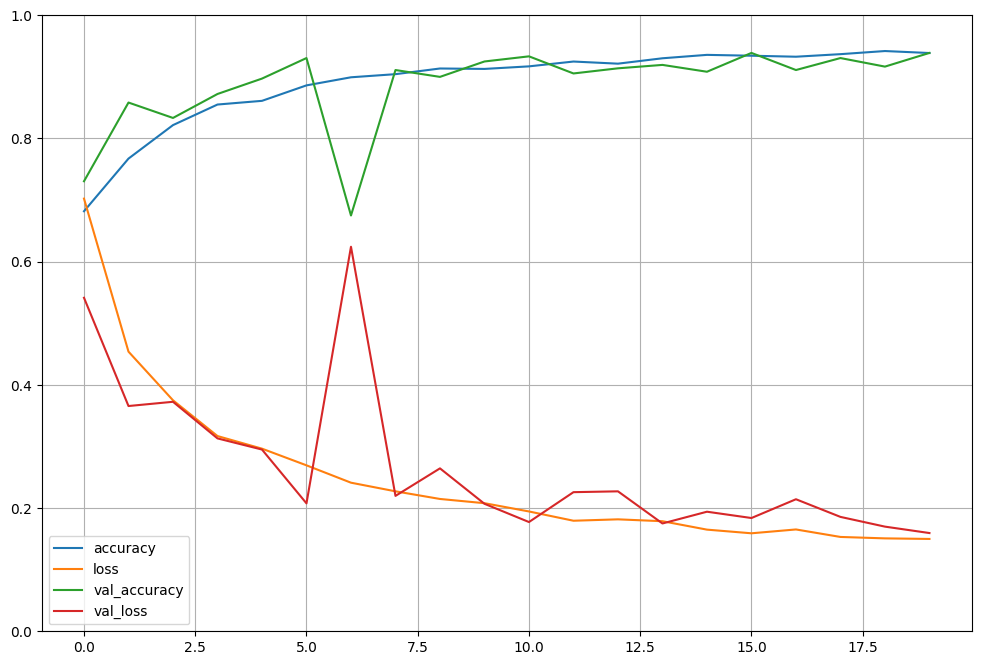

In [7]:
pd.DataFrame(history_nn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Matrizes de confusão de algumas partes do dataset

In [43]:
def monta_matriz_confusao(labels_reais, labels_estimadas, titulo):
    cm = confusion_matrix(labels_reais, labels_estimadas)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nomes_classes)

    # Plotar a matriz de confusão
    plt.figure(figsize = (8, 8))
    disp.plot(cmap = plt.cm.Blues)
    plt.title(titulo)
    plt.ylabel("Classe real")
    plt.xlabel("Classe estimada")
    plt.xticks(rotation =  45)

imagens_por_linha = 5

def mostra_grid_classificacao(imagens, labels_reais, labels_estimadas, titulo):
    num_imagens = len(imagens)
    num_linhas = (num_imagens + imagens_por_linha - 1) // imagens_por_linha

    plt.figure(figsize = (15, num_linhas * 3))
    plt.suptitle(titulo, fontsize = 16)

    for i in range(num_imagens):
        plt.subplot(num_linhas, imagens_por_linha, i + 1)
        plt.imshow(imagens[i])

        label_real     = nomes_classes[int(labels_reais    [i])]
        label_estimada = nomes_classes[int(labels_estimadas[i])]

        plt.title(f"Real: {label_real}\nEstimada: {label_estimada}")
        plt.axis("off")

    plt.tight_layout(h_pad = 4, rect = [0, 0.03, 1, 0.95])	
    plt.show()

12/12 - 0s - 28ms/step


<Figure size 800x800 with 0 Axes>

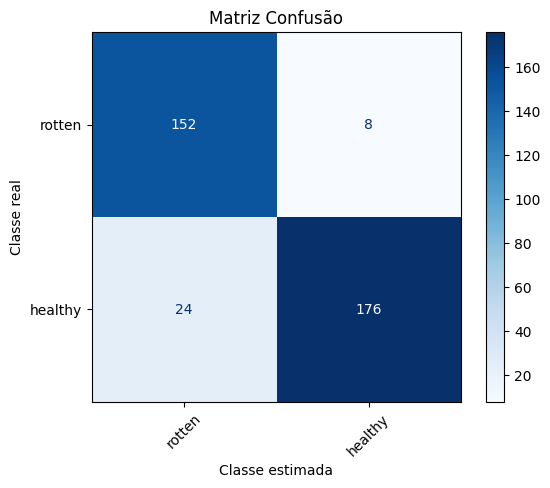

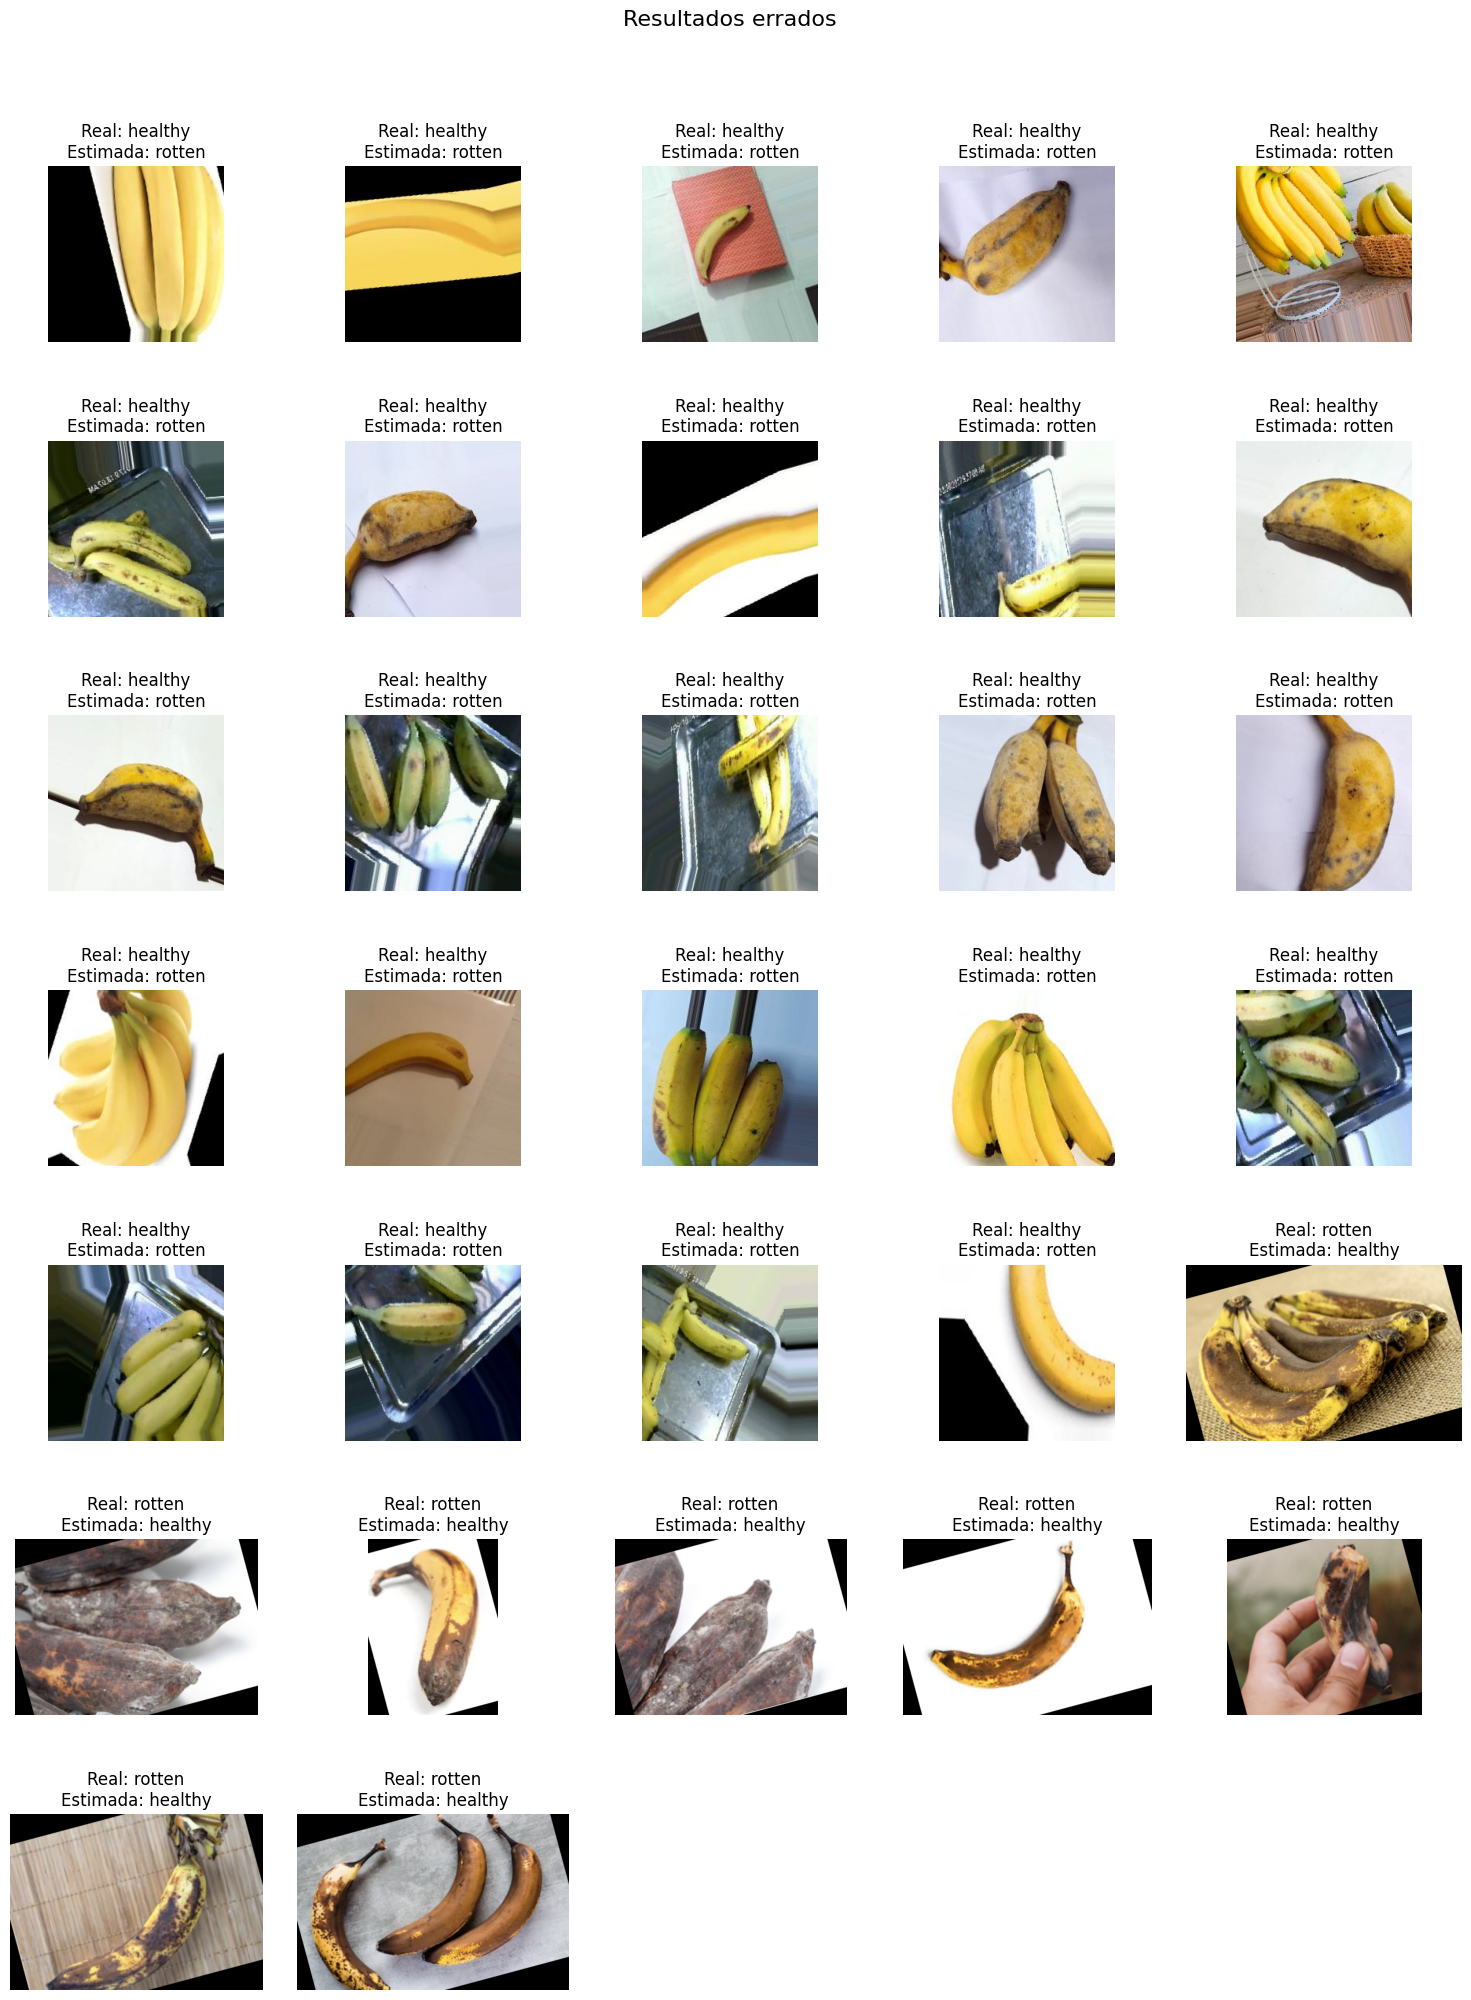

In [44]:
rotulos_esperados = y_test

comparacao_imagem           = []
comparacao_labels_reais     = []
comparacao_labels_estimadas = []

resultados = nn.predict(x_test, verbose = 2)
rotulos_obtidos = []

for i in range (len(resultados)):
    rotulos_obtidos.append(np.argmax(resultados[i], axis = -1))

    if rotulos_obtidos[i] != rotulos_esperados[i]:
            comparacao_imagem          .append(x_normais[i])
            comparacao_labels_reais    .append(rotulos_esperados[i])
            comparacao_labels_estimadas.append(rotulos_obtidos[i])

monta_matriz_confusao(rotulos_esperados, rotulos_obtidos, "Matriz Confusão")
mostra_grid_classificacao(comparacao_imagem, comparacao_labels_reais, comparacao_labels_estimadas, "Resultados errados")